Logistic Regression

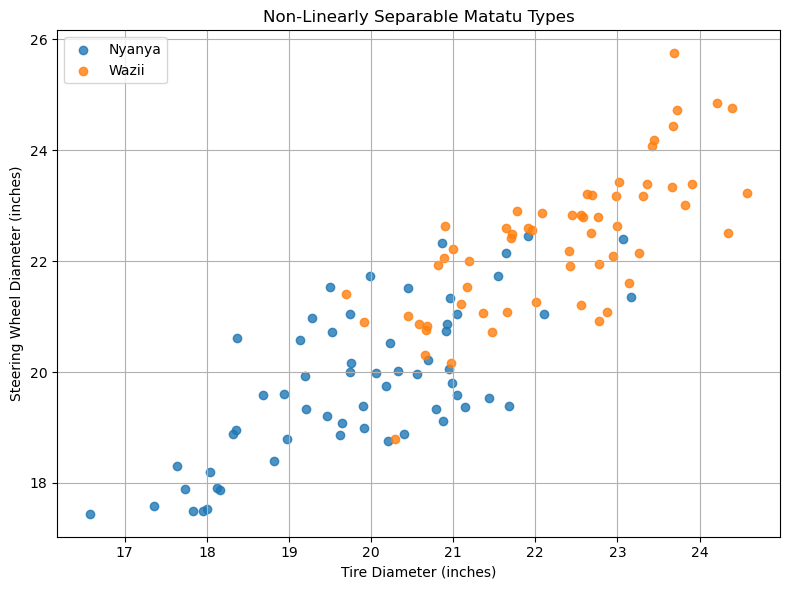

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(7)

# Create overlapping diagonal clusters
nyanya = np.random.multivariate_normal(
    mean=[20, 20], cov=[[2.0, 1.5], [1.5, 2.0]], size=60
)
wazii = np.random.multivariate_normal(
    mean=[22, 22], cov=[[2.0, 1.5], [1.5, 2.0]], size=60
)

# Combine
data_diagonal = pd.DataFrame({
    'Tire_Diameter': np.concatenate([nyanya[:, 0], wazii[:, 0]]),
    'Steering_Diameter': np.concatenate([nyanya[:, 1], wazii[:, 1]]),
    'Type': ['Nyanya'] * 60 + ['Wazii'] * 60
})

# Plot
plt.figure(figsize=(8, 6))
for label, color in zip(['Nyanya', 'Wazii'], ['magenta', 'teal']):
    subset = data_diagonal[data_diagonal['Type'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'], 
                label=label, alpha=0.8)

plt.xlabel('Tire Diameter (inches)')
plt.ylabel('Steering Wheel Diameter (inches)')
plt.title('Non-Linearly Separable Matatu Types')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


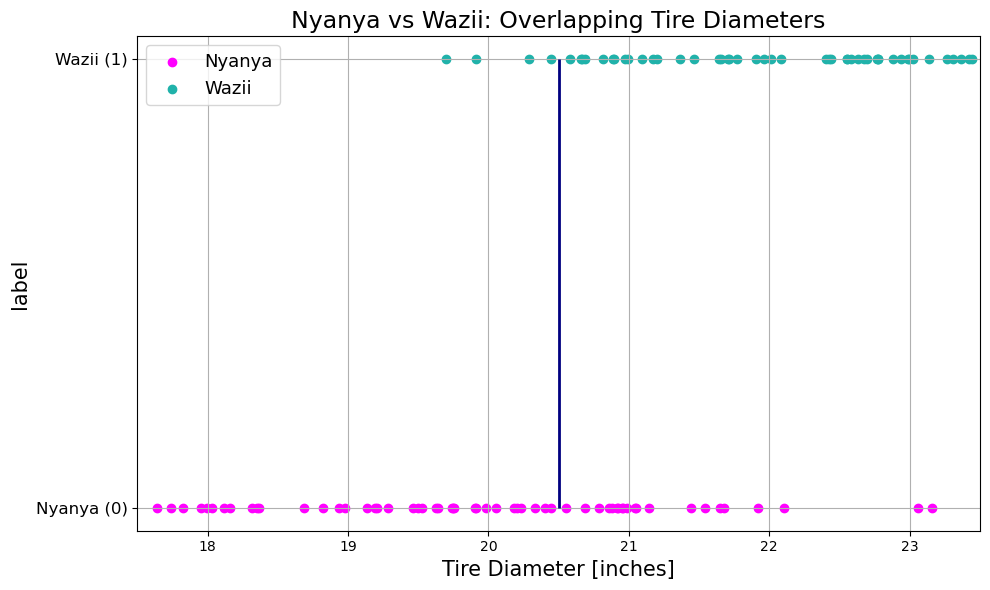

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Separate classes from the original data_diagonal
nyanya_1d = data_diagonal[data_diagonal['Type'] == 'Nyanya']['Tire_Diameter']
wazii_1d = data_diagonal[data_diagonal['Type'] == 'Wazii']['Tire_Diameter']

plt.figure(figsize=(10, 6))
plt.xlim(17.5, 23.5)

# 1D horizontal scatter for both types
plt.scatter(nyanya_1d, np.zeros_like(nyanya_1d), color='magenta', label='Nyanya')
plt.scatter(wazii_1d, np.ones_like(wazii_1d), color='lightseagreen', label='Wazii')

# Optional: add a decision boundary guess
plt.vlines(20.5, 0, 1, color='navy', linewidth=2)

# Labeling
plt.xlabel("Tire Diameter [inches]", fontsize=15)
plt.ylabel("label", fontsize=15)
plt.yticks([0, 1], ['Nyanya (0)', 'Wazii (1)'], fontsize=12)
plt.title("Nyanya vs Wazii: Overlapping Tire Diameters", fontsize=17)
plt.legend(fontsize=13, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


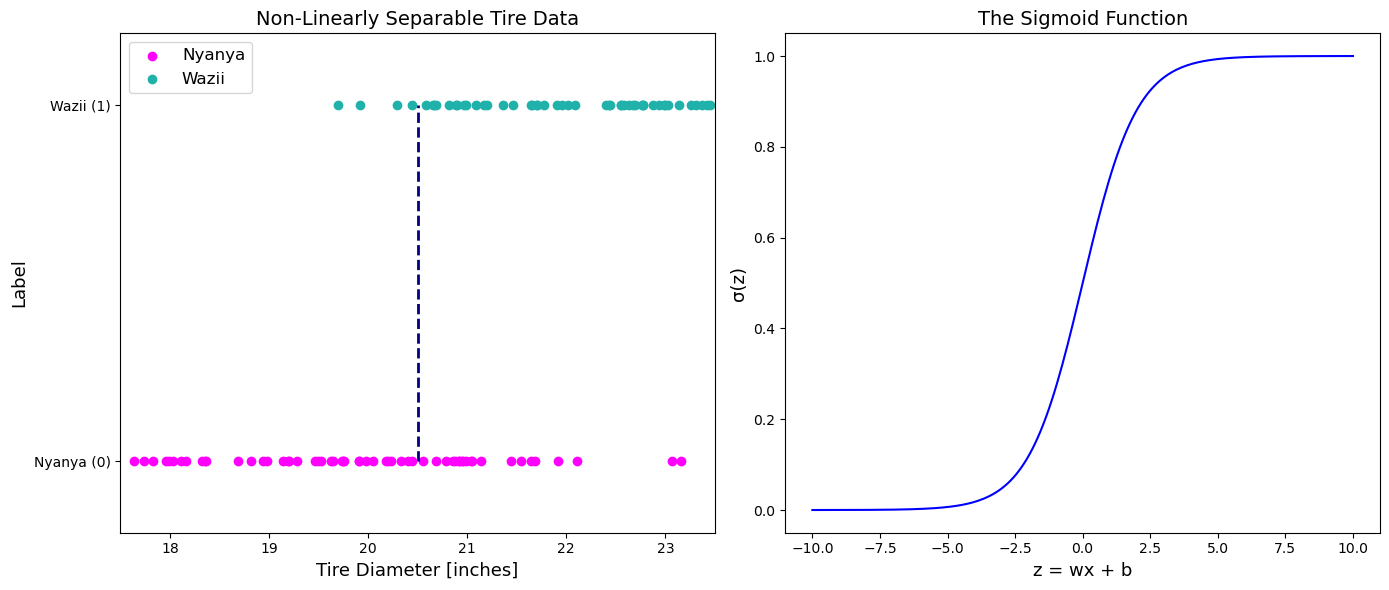

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use your existing DataFrame: data_diagonal
nyanya_tire = data_diagonal[data_diagonal['Type'] == 'Nyanya']['Tire_Diameter']
wazii_tire = data_diagonal[data_diagonal['Type'] == 'Wazii']['Tire_Diameter']

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot layout
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# === Left: 1D Class Labels ===
axs[0].scatter(nyanya_tire, np.zeros_like(nyanya_tire), color='magenta', label='Nyanya')
axs[0].scatter(wazii_tire, np.ones_like(wazii_tire), color='lightseagreen', label='Wazii')

# Vertical "decision boundary" line
axs[0].vlines(20.5, 0, 1, color='navy', linestyle='--', linewidth=2)

# Format
axs[0].set_xlim(17.5, 23.5)
axs[0].set_ylim(-0.2, 1.2)
axs[0].set_xlabel("Tire Diameter [inches]", fontsize=13)
axs[0].set_ylabel("Label", fontsize=13)
axs[0].set_yticks([0, 1])
axs[0].set_yticklabels(["Nyanya (0)", "Wazii (1)"])
axs[0].set_title("Non-Linearly Separable Tire Data", fontsize=14)
axs[0].legend(loc="upper left", fontsize=12)
axs[0].grid(False)

# === Right: Sigmoid Plot ===
z = np.linspace(-10, 10, 200)
axs[1].plot(z, sigmoid(z), color='blue')
axs[1].set_xlabel("z = wx + b", fontsize=13)
axs[1].set_ylabel("σ(z)", fontsize=13)
axs[1].set_title("The Sigmoid Function", fontsize=14)
axs[1].grid(False)

# Finalize
plt.tight_layout()
plt.show()


Generated overlapping data:
   Tire_Diameter  Steering_Diameter    Type
0      17.996613          17.530676  Nyanya
1      19.752825          20.160341  Nyanya
2      21.042614          21.044680  Nyanya
3      20.878540          19.123816  Nyanya
4      18.353516          18.954014  Nyanya


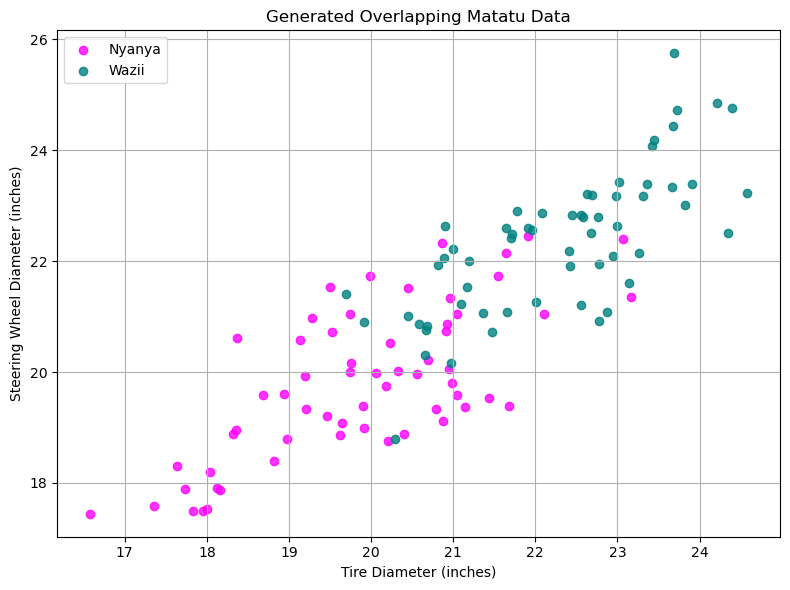


Data prepared for model: 120 samples, 2 features.
X_data shape: (120, 2)
Y_data shape: (120,)
Unique Y values: [0 1]

--- Starting Logistic Regression SGD Training ---
Epochs: 200, Learning Rate: 0.01
Initial weights (incl. bias): [0.00298579 0.00485922 0.00505053]
Epoch 20/200: Cost (LogLoss) = 2.4245
Epoch 40/200: Cost (LogLoss) = 1.3518
Epoch 60/200: Cost (LogLoss) = 2.7300
Epoch 80/200: Cost (LogLoss) = 0.9005
Epoch 100/200: Cost (LogLoss) = 1.9382
Epoch 120/200: Cost (LogLoss) = 1.6917
Epoch 140/200: Cost (LogLoss) = 2.5914
Epoch 160/200: Cost (LogLoss) = 0.7629
Epoch 180/200: Cost (LogLoss) = 1.1766
Epoch 200/200: Cost (LogLoss) = 2.7631
--- Training Complete ---
Final weights (incl. bias): [-0.55060138  1.18415008 -6.98069645]
Final cost (LogLoss): 2.7631

Extracted parameters: Weights w = [-0.55060138  1.18415008], Bias b = -6.9807


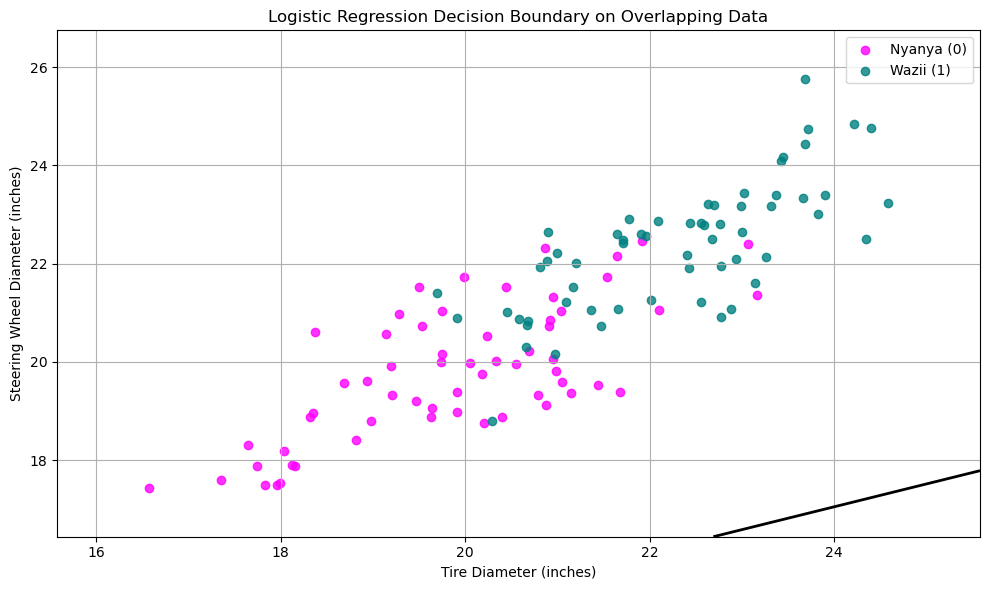

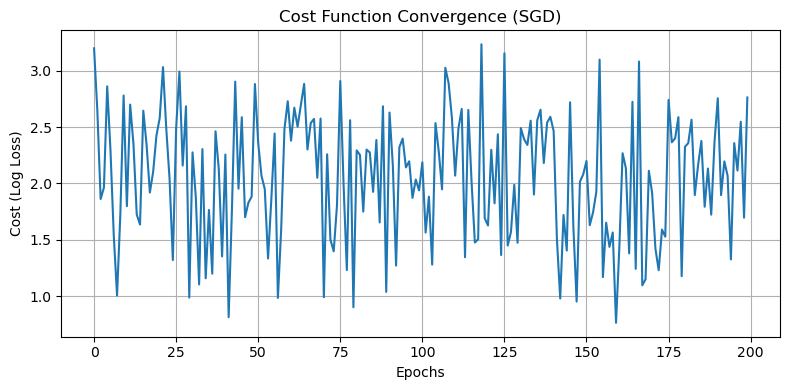

In [8]:
# Full Code: Logistic Regression with SingleNeuron on Overlapping Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ======================================================
# 1. Data Generation (User's Code)
# ======================================================
np.random.seed(7) # for reproducibility

# Create overlapping diagonal clusters
nyanya_mean = [20, 20]
nyanya_cov = [[2.0, 1.5], [1.5, 2.0]]
nyanya_data = np.random.multivariate_normal(mean=nyanya_mean, cov=nyanya_cov, size=60)

wazii_mean = [22, 22]
wazii_cov = [[2.0, 1.5], [1.5, 2.0]] # Same covariance, different mean
wazii_data = np.random.multivariate_normal(mean=wazii_mean, cov=wazii_cov, size=60)

# Combine into DataFrame
data_diagonal = pd.DataFrame({
    'Tire_Diameter': np.concatenate([nyanya_data[:, 0], wazii_data[:, 0]]),
    'Steering_Diameter': np.concatenate([nyanya_data[:, 1], wazii_data[:, 1]]),
    'Type': ['Nyanya'] * 60 + ['Wazii'] * 60
})

print("Generated overlapping data:")
print(data_diagonal.head())

# Optional: Plot the generated data first
plt.figure(figsize=(8, 6))
for label, color in zip(['Nyanya', 'Wazii'], ['magenta', 'teal']):
    subset = data_diagonal[data_diagonal['Type'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'],
                label=label, alpha=0.8, color=color) # Assign color explicitly

plt.xlabel('Tire Diameter (inches)')
plt.ylabel('Steering Wheel Diameter (inches)')
plt.title('Generated Overlapping Matatu Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ======================================================
# 2. Activation Function: Sigmoid
# ======================================================
def sigmoid(z):
  """Sigmoid activation function."""
  z = np.clip(z, -500, 500) # Avoid overflow
  return 1.0 / (1.0 + np.exp(-z))

# ======================================================
# 3. Class Definition: SingleNeuron (Adapted for Logistic Regression)
# ======================================================
class SingleNeuron(object):
    """
    A class used to represent a single neuron for
    Binary Logistic Regression using SGD.
    """
    def __init__(self, activation_function, n_features):
        self.activation_function = activation_function
        self.w_ = np.random.rand(1 + n_features) * 0.01
        self.errors_ = []

    def train(self, X, y, alpha=0.01, epochs=1000):
        self.errors_ = []
        n_samples = X.shape[0]
        if n_samples == 0: return

        print(f"\n--- Starting Logistic Regression SGD Training ---")
        print(f"Epochs: {epochs}, Learning Rate: {alpha}")
        print(f"Initial weights (incl. bias): {self.w_}")

        for epoch in range(epochs):
            indices = list(range(n_samples))
            random.shuffle(indices)

            for i in indices:
                xi = X[i]
                target = y[i] # Expects 0 or 1
                prediction_prob = self.predict(xi)
                error = prediction_prob - target
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error

            # Calculate Full Dataset Cost (Log Loss) at Epoch End
            p_full = np.clip(self.predict(X), 1e-10, 1 - 1e-10)
            epoch_cost = -np.mean(y * np.log(p_full) + (1 - y) * np.log(1 - p_full))
            self.errors_.append(epoch_cost)

            if (epoch + 1) % (epochs // 10 or 1) == 0:
                print(f"Epoch {epoch+1}/{epochs}: Cost (LogLoss) = {epoch_cost:.4f}")
                if np.isnan(epoch_cost) or np.isinf(epoch_cost):
                     print("\nWarning: Cost unstable!")
                     # return # Optional early stop

        print("--- Training Complete ---")
        print(f"Final weights (incl. bias): {self.w_}")
        if self.errors_: print(f"Final cost (LogLoss): {self.errors_[-1]:.4f}")
        return self

    def predict_prob(self, X):
         return self.predict(X)

    def predict_class(self, X, threshold=0.5):
         probabilities = self.predict_prob(X)
         return np.where(probabilities >= threshold, 1, 0)

    def predict(self, X):
        if X.ndim == 1:
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        else:
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

# ======================================================
# 4. Example Usage with the New Overlapping Data
# ======================================================

# --- Prepare Data ---
# Use the 'data_diagonal' DataFrame generated above
try:
    # Features: Tire_Diameter (X1), Steering_Diameter (X2)
    # Important: Keep the order consistent with how you plotted/view the data
    X_data = data_diagonal[['Tire_Diameter', 'Steering_Diameter']].values
    Y_labels = data_diagonal['Type'].values
    # Convert labels to 0 and 1 (e.g., Wazii=1, Nyanya=0)
    Y_data = np.where(Y_labels == "Wazii", 1, 0)

    n_features = X_data.shape[1] # Should be 2
    print(f"\nData prepared for model: {len(X_data)} samples, {n_features} features.")
    print(f"X_data shape: {X_data.shape}")
    print(f"Y_data shape: {Y_data.shape}")
    print(f"Unique Y values: {np.unique(Y_data)}") # Should be [0 1]
except Exception as e:
    print(f"Error preparing data from DataFrame: {e}")
    exit()

# --- Create Neuron Instance ---
neuron = SingleNeuron(activation_function=sigmoid, n_features=n_features)

# --- Train the Neuron ---
# Adjust learning rate and epochs if needed
learning_rate_alpha = 0.01
train_epochs = 200
neuron.train(X_data, Y_data, alpha=learning_rate_alpha, epochs=train_epochs)

# --- Get Final Parameters ---
if hasattr(neuron, 'w_') and neuron.w_ is not None:
    final_w = neuron.w_[:-1] # Weights w1, w2
    final_b = neuron.w_[-1]  # Bias b
    print(f"\nExtracted parameters: Weights w = {final_w}, Bias b = {final_b:.4f}")
    valid_params = not (np.any(np.isnan(neuron.w_)) or np.any(np.isinf(neuron.w_)))
else:
    valid_params = False

# --- Visualization ---
if valid_params:
    # Plot Data Points colored by true class
    plt.figure(figsize=(10, 6))
    # Plot Nyanya (Class 0)
    plt.scatter(X_data[Y_data==0, 0], X_data[Y_data==0, 1],
                color='magenta', alpha=0.8, label='Nyanya (0)')
    # Plot Wazii (Class 1)
    plt.scatter(X_data[Y_data==1, 0], X_data[Y_data==1, 1],
                color='teal', alpha=0.8, label='Wazii (1)')

    # Plot the Decision Boundary (where w1*x1 + w2*x2 + b = 0)
    x1_min, x1_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    x2_min, x2_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    grid_z = np.dot(np.c_[xx1.ravel(), xx2.ravel()], final_w) + final_b
    grid_probs = sigmoid(grid_z).reshape(xx1.shape)

    # Plot the boundary line where probability=0.5
    plt.contour(xx1, xx2, grid_probs, levels=[0.5], colors='black', linewidths=2)

    plt.xlabel('Tire Diameter (inches)') # Corresponds to X_data[:, 0]
    plt.ylabel('Steering Wheel Diameter (inches)') # Corresponds to X_data[:, 1]
    plt.title('Logistic Regression Decision Boundary on Overlapping Data')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Cost History (Log Loss)
    if neuron.errors_:
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(neuron.errors_)), neuron.errors_)
        plt.xlabel("Epochs")
        plt.ylabel("Cost (Log Loss)")
        plt.title("Cost Function Convergence (SGD)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("\nCannot plot results due to invalid parameters or training failure.")